Usando o exemplo 499

In [42]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime

%pip install imbalanced-learn

%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [44]:
#importando dataset

df = pd.read_csv("../all-data.csv")

In [45]:
df.head(5)

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [46]:
df.shape

(4846, 2)

<Axes: xlabel='sentiment', ylabel='count'>

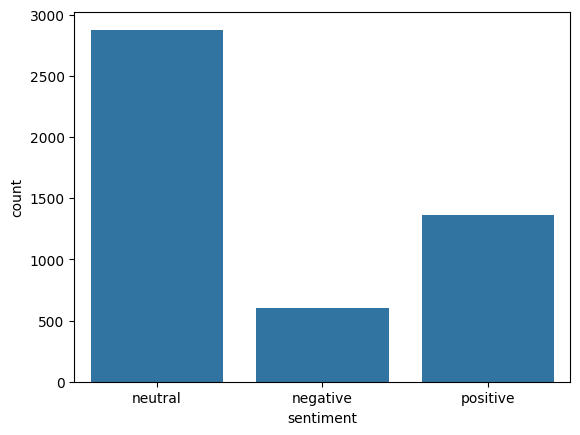

In [47]:
sns.countplot(x="sentiment", data=df) # Quantidade de classes

**Pré-processamento**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' resource


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [50]:
df["clean_text"] = df["text"].apply(preprocess_text)

In [51]:
df.head(5)

,sentiment,text,clean_text
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...


<Axes: xlabel='sentiment', ylabel='count'>

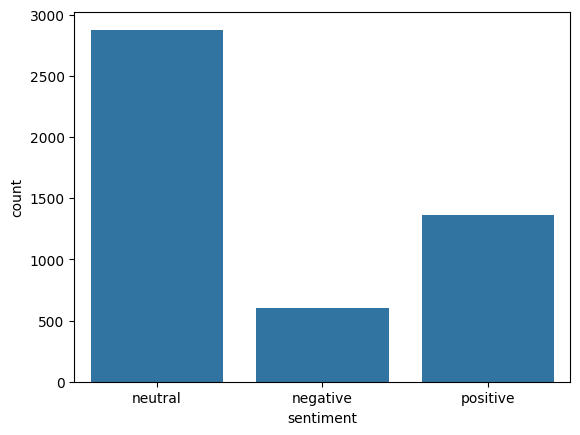

In [52]:
sns.countplot(x="sentiment", data=df) # validando se mudou as classes

**OVERSAMPLING**

In [53]:
from imblearn.over_sampling import SMOTE

In [71]:
from imblearn.pipeline import Pipeline as imbpipeline #importa o pipeline do imblearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_smote = imbpipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC())
])

pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)

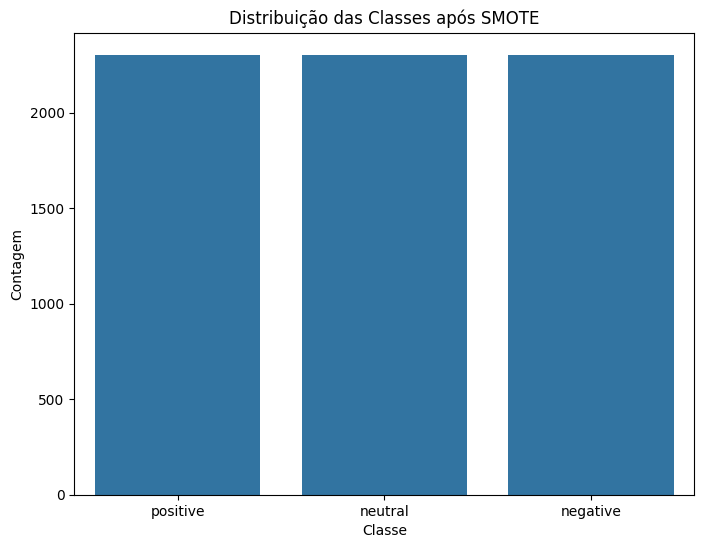

Contagem das classes após SMOTE:
sentiment
positive    2303
neutral     2303
negative    2303
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
# Obter as classes balanceadas após o SMOTE
y_resampled = pipeline_smote.named_steps['smote'].fit_resample(
    pipeline_smote.named_steps['vect'].fit_transform(X_train), y_train
)[1]

# Contar a distribuição das classes
class_distribution = pd.Series(y_resampled).value_counts()

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes após SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Imprimir a contagem das classes
print('Contagem das classes após SMOTE:')
print(class_distribution)

**LIME**

In [73]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['clean_text']
y = df['sentiment']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer


def predict_proba(texts):
    scores = pipeline_smote.decision_function(texts)
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline_smote.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline_smote.classes_))

explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 499
Original text:
preliminary estimation technology park measure square meter
Real class: neutral
Classe predita: neutral


In [76]:
# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
square: 0.0935
measure: 0.0675
technology: -0.0571
estimation: 0.0561
preliminary: -0.0492
meter: 0.0460
park: 0.0232


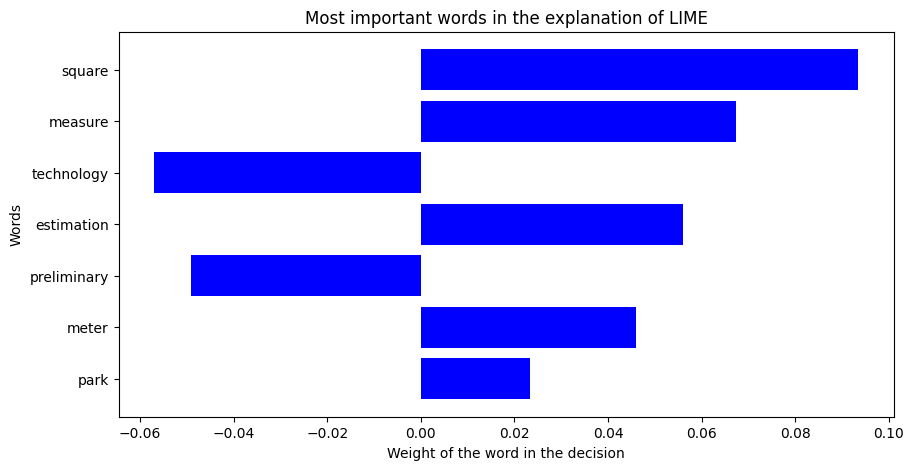

In [77]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [78]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Word", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Word,Impact
0,square,0.093545
1,measure,0.067469
3,estimation,0.056112
5,meter,0.045976
6,park,0.023237
4,preliminary,-0.049191
2,technology,-0.057077


<Figure size 1000x600 with 0 Axes>

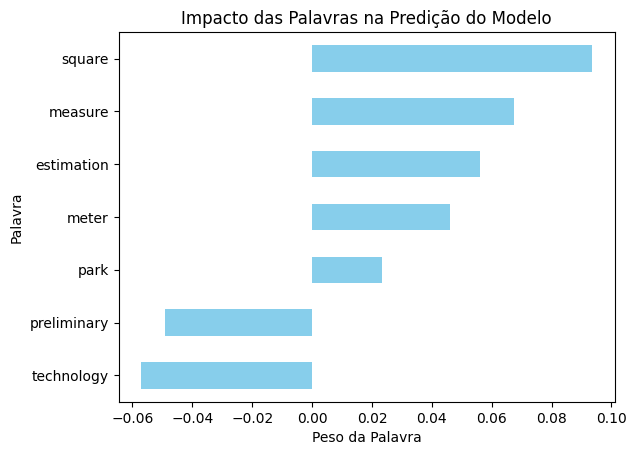

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
lime_df.plot(kind="barh", x="Word", y="Impact", color="skyblue", legend=False)
plt.xlabel("Peso da Palavra")
plt.ylabel("Palavra")
plt.title("Impacto das Palavras na Predição do Modelo")
plt.gca().invert_yaxis()  # Inverte o eixo para as palavras mais importantes ficarem no topo
plt.show()

In [80]:
y_pred = pipeline_smote.predict(X_test)

**Métricas**

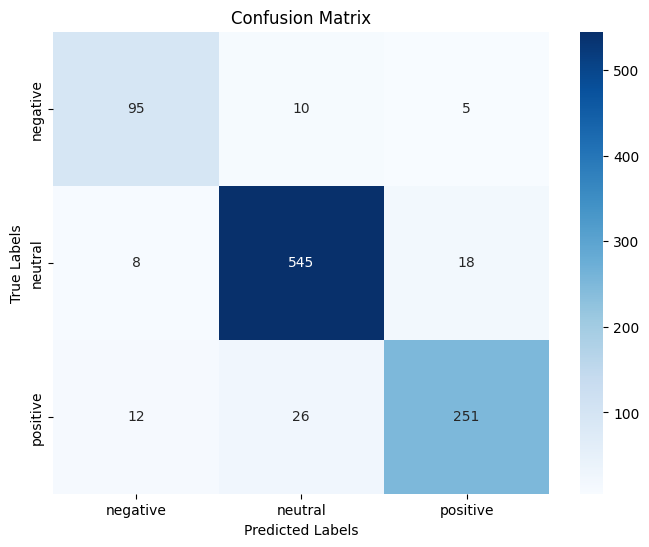

In [81]:
# prompt: matriz de confusão

import matplotlib.pyplot as plt
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline_smote.classes_, yticklabels=pipeline_smote.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acurácia: 0.9186
Precisão: 0.9188
Recall: 0.9186
F1-Score: 0.9184


**Attention Vizualization**

In [83]:
#verificando a ordem das classes
print(pipeline_smote.classes_)

['negative' 'neutral' 'positive']


Palavras do exemplo e seus pesos na decisão da classe prevista:
          Feature    Weight
4041      measure  0.953999
6330       square  0.850644
2102   estimation  0.539366
4102        meter  0.487408
4782         park  0.300631
5109  preliminary -0.275803
6686   technology -0.584656


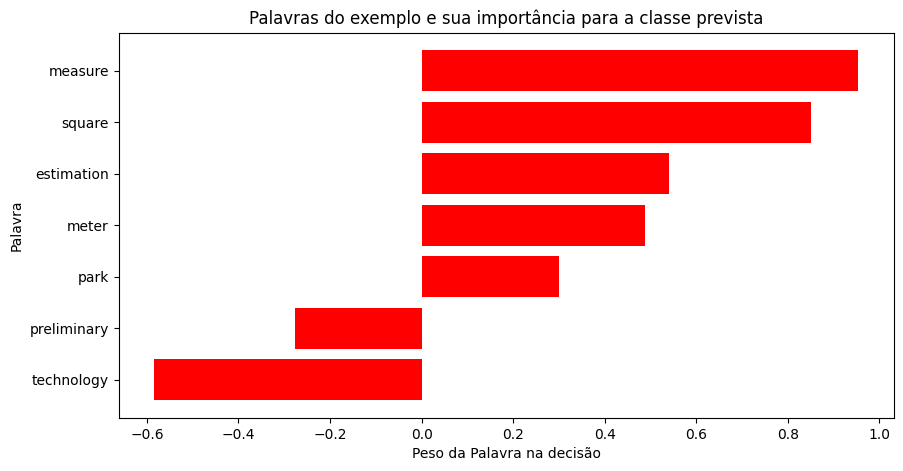

In [84]:
# Use o mesmo sample_text do LIME
feature_names = pipeline_smote.named_steps['vect'].get_feature_names_out()

classe_prevista = pipeline_smote.predict([sample_text])[0]
classe_idx = list(pipeline_smote.classes_).index(classe_prevista)
pesos = pipeline_smote.named_steps['clf'].coef_[classe_idx]

importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})
palavras_exemplo = set(sample_text.split())
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

Shapley

c:\Users\LUIRYS SILVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


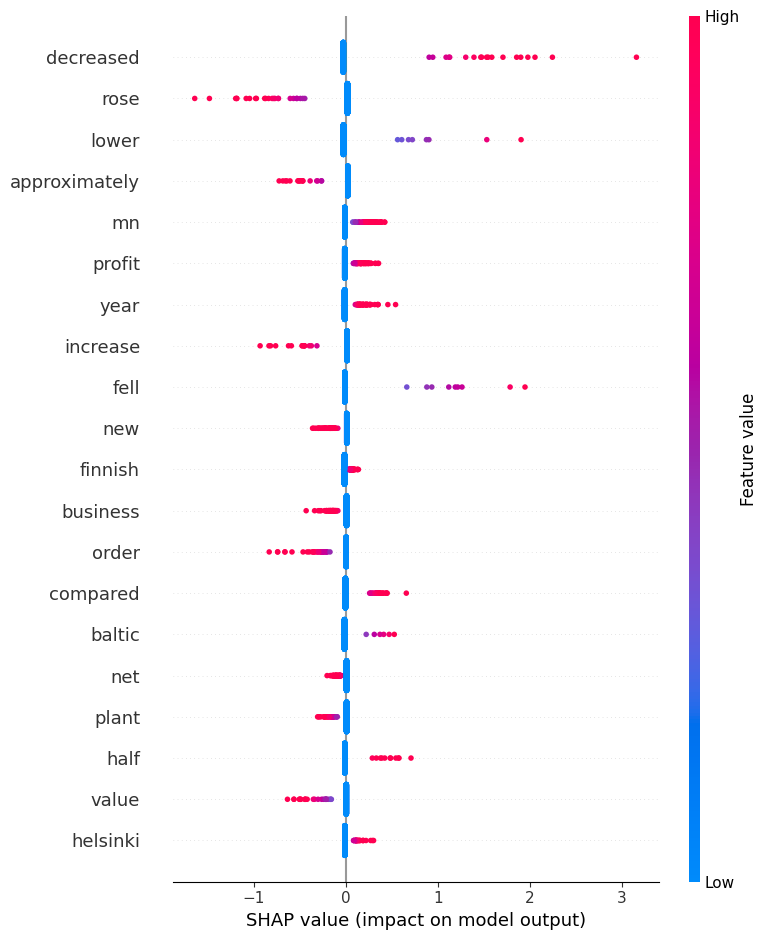

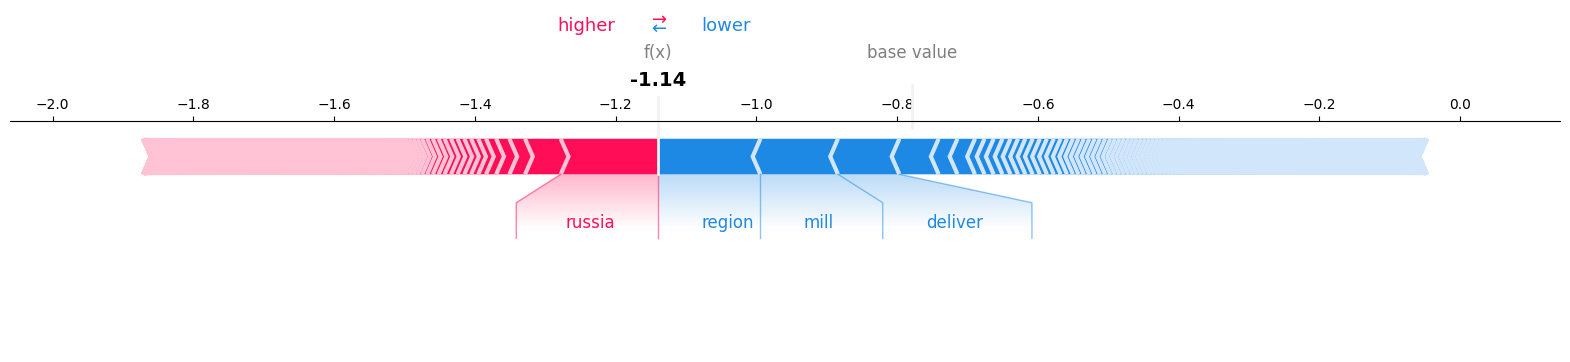

In [85]:
# Transformar os dados usando o pipeline (sem o classificador)
X_train_transformed = pipeline_smote.named_steps['tfidf'].transform(
    pipeline_smote.named_steps['vect'].transform(X_train)
)

X_test_transformed = pipeline_smote.named_steps['tfidf'].transform(
    pipeline_smote.named_steps['vect'].transform(X_test)
)

# Selecionar um subconjunto do treino como background (melhora performance e evita estouro de memória)
background_size = 100
background = X_train_transformed[np.random.choice(X_train_transformed.shape[0], 
                                                  min(background_size, X_train_transformed.shape[0]), 
                                                  replace=False)]

# Criar o explainer para modelo linear
explainer = shap.LinearExplainer(
    pipeline_smote.named_steps['clf'],
    background,
    feature_perturbation="interventional"
)

# Calcular valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test_transformed)

# Obter nomes das features
feature_names = pipeline_smote.named_steps['vect'].get_feature_names_out()

X_test_dense = X_test_transformed.toarray()
feature_names = pipeline_smote.named_steps['vect'].get_feature_names_out()

class_idx = 0  # escolha a classe (0=neg, 1=neu, 2=pos)

# Seleciona a classe no ÚLTIMO eixo
shap_class = shap_values[:, :, class_idx]

# Summary plot
shap.summary_plot(
    shap_class,
    X_test_dense,
    feature_names=feature_names
)

# Force plot de uma instância
idx = 0
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_class[idx],
    feature_names=feature_names,
    matplotlib=True
)


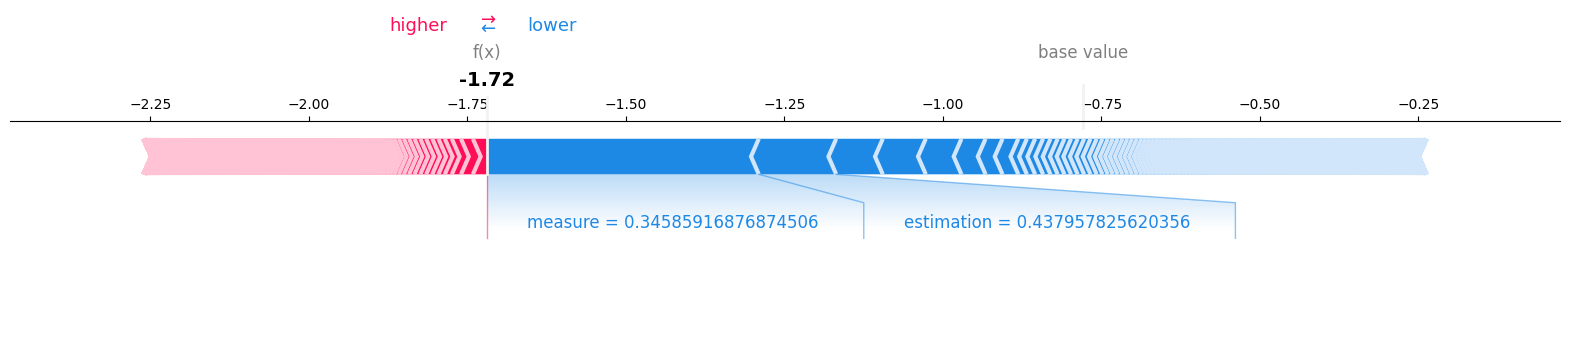

In [86]:
# =========================
# SHAP para mesma instância usada no LIME
# =========================

lime_idx = 499  # <<< coloque aqui o mesmo índice usado no LIME
class_idx = 0  # mesma classe analisada no LIME

X_test_dense = X_test_transformed.toarray()

# Seleciona a classe correta
shap_class = shap_values[:, :, class_idx]

# Force plot da mesma instância
shap.force_plot(
    explainer.expected_value[class_idx],
    shap_class[lime_idx],
    X_test_dense[lime_idx],
    feature_names=feature_names,
    matplotlib=True
)
